### Data Cleaning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1=pd.read_csv("Bejaia Region ForestFire Dataset.csv")
df1["Region"]=0
df2=pd.read_csv("Sidi-Bel Abbes Region ForestFire Dataset.csv")
df2["Region"]=1
df=pd.concat([df1,df2]).reset_index(drop=True)
df.to_csv("Algerian_forest_fires_dataset_UPDATE.csv",index=False)  ## use index=False so that index will not save
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [4]:
df.shape

(244, 15)

In [5]:
# duplicated
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [7]:
df.columns=df.columns.str.strip()

In [8]:
# remove the null
df.dropna().reset_index(drop=True)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 28.7+ KB


In [10]:
df["DC"]=df["DC"].str.split(' ').str[0].astype(float)

In [11]:
df.drop(df[df['FWI'].str.isnumeric()==False].index,inplace=True)
df.shape

(138, 15)

In [12]:
df["FWI"]=df["FWI"].str.split(' ').str[0].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 0 to 240
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          138 non-null    int64  
 1   month        138 non-null    int64  
 2   year         138 non-null    int64  
 3   Temperature  138 non-null    int64  
 4   RH           138 non-null    int64  
 5   Ws           138 non-null    int64  
 6   Rain         138 non-null    float64
 7   FFMC         138 non-null    float64
 8   DMC          138 non-null    float64
 9   DC           16 non-null     float64
 10  ISI          138 non-null    float64
 11  BUI          138 non-null    float64
 12  FWI          16 non-null     float64
 13  Classes      138 non-null    object 
 14  Region       138 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 17.2+ KB


In [14]:
df.to_csv("Algerian_forest_fires_dataset_Cleaned.csv",index=False)

In [15]:
df=pd.read_csv("Algerian_forest_fires_dataset_Cleaned.csv")

## EDA 

In [16]:
# convert the Classes
df["Classes"]=df["Classes"].str.strip()
df["Classes"].unique()

array(['not fire', 'fire'], dtype=object)

In [17]:
df["Classes"]=df["Classes"].map({"not fire":0,"fire":1}).astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          138 non-null    int64  
 1   month        138 non-null    int64  
 2   year         138 non-null    int64  
 3   Temperature  138 non-null    int64  
 4   RH           138 non-null    int64  
 5   Ws           138 non-null    int64  
 6   Rain         138 non-null    float64
 7   FFMC         138 non-null    float64
 8   DMC          138 non-null    float64
 9   DC           16 non-null     float64
 10  ISI          138 non-null    float64
 11  BUI          138 non-null    float64
 12  FWI          16 non-null     float64
 13  Classes      138 non-null    int32  
 14  Region       138 non-null    int64  
dtypes: float64(7), int32(1), int64(7)
memory usage: 15.8 KB


([<matplotlib.patches.Wedge at 0x21e6094b800>,
 [Text(-0.025039511672861187, 1.0997149734613896, '1'),
  Text(0.025039511672860806, -1.0997149734613896, '0')],
 [Text(-0.013657915457924283, 0.5998445309789397, '50.7'),
  Text(0.013657915457924075, -0.5998445309789397, '49.3')])

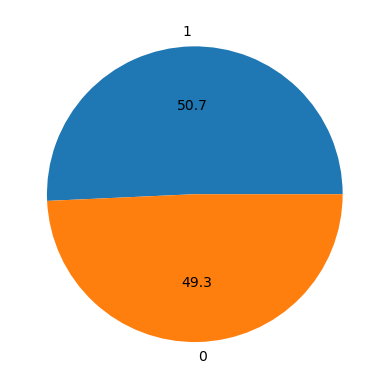

In [19]:
unique_values=df["Classes"].value_counts()
plt.pie(unique_values,autopct="%1.1f",labels=unique_values.index)

In [20]:
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,0.025959,NaN,0.179985,-0.165488,0.020527,-0.093079,0.278200,0.525930,0.434524,0.313116,0.544113,0.196760,0.279134,0.051509
month,0.025959,1.000000,NaN,-0.073305,0.028803,-0.014723,0.148665,-0.109156,-0.018218,0.148733,-0.067121,-0.010142,-0.152224,-0.111231,-0.054336
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.179985,-0.073305,NaN,1.000000,-0.671457,-0.250636,-0.446212,0.737703,0.568352,0.465073,0.667945,0.549961,0.659398,0.526433,0.211567
RH,-0.165488,0.028803,NaN,-0.671457,1.000000,0.230934,0.288786,-0.668149,-0.383868,-0.262846,-0.678147,-0.343829,-0.740827,-0.428877,-0.303631
Ws,0.020527,-0.014723,NaN,-0.250636,0.230934,1.000000,0.340923,-0.202634,0.018090,-0.059007,-0.051524,0.047559,0.027193,-0.092368,-0.099742
Rain,-0.093079,0.148665,NaN,-0.446212,0.288786,0.340923,1.000000,-0.551257,-0.270369,-0.368711,-0.341367,-0.277969,-0.354497,-0.314561,-0.023007
FFMC,0.278200,-0.109156,NaN,0.737703,-0.668149,-0.202634,-0.551257,1.000000,0.619259,0.482190,0.758299,0.603558,0.656264,0.743958,0.121803
DMC,0.525930,-0.018218,NaN,0.568352,-0.383868,0.018090,-0.270369,0.619259,1.000000,0.769953,0.739831,0.989487,0.859624,0.626645,0.151091
DC,0.434524,0.148733,NaN,0.465073,-0.262846,-0.059007,-0.368711,0.482190,0.769953,1.000000,0.487744,0.891018,0.638433,0.505344,NaN


<Axes: >

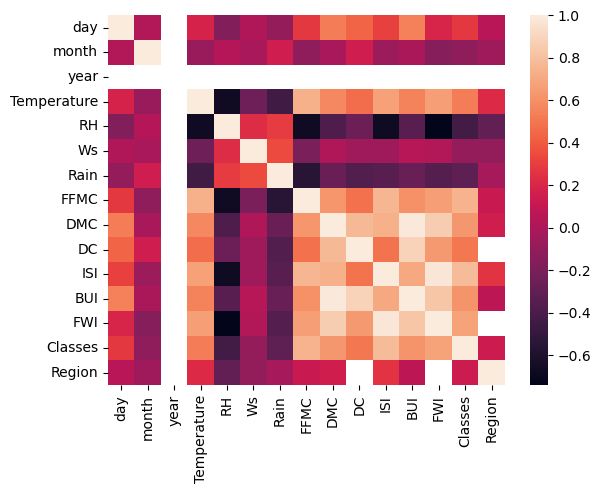

In [21]:
plt.Figure(figsize=(18,11))
sns.heatmap(df.corr())

Text(0.5, 1.0, 'Bejaia FRegion Fire data')

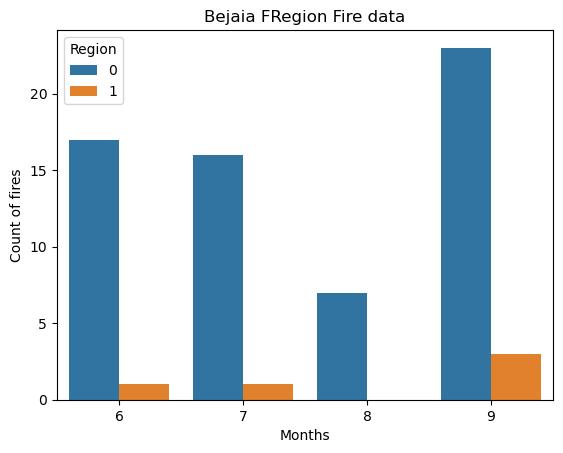

In [29]:
# month by fire for Bejaia region
df_for_Bejaia=df[df["Classes"]==0]
sns.countplot(data=df_for_Bejaia,x='month',hue="Region")
plt.xlabel("Months")
plt.ylabel("Count of fires")
plt.title("Bejaia FRegion Fire data")

Text(0.5, 1.0, 'Sidi Bel FRegion Fire data')

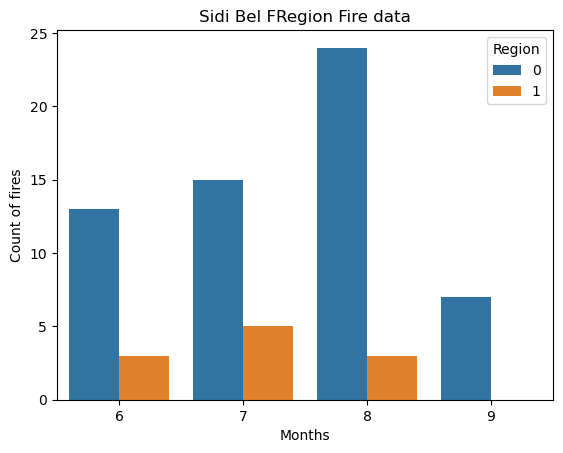

In [30]:
# month by fire for Sidi_bel region
df_for_Sidi_bel=df[df["Classes"]==1]
sns.countplot(data=df_for_Sidi_bel,x='month',hue="Region")
plt.xlabel("Months")
plt.ylabel("Count of fires")
plt.title("Sidi Bel FRegion Fire data")